# IPL Facebook Engagement Analysis: Insights from Three Years

# Authored by :

**Team - AlphaSquad**\
Venkat Keerthi Chakravartula-U76641744\
Gowtham Sai Bhuvanam- U85421734\
Siva Saketh Ravinuthala - U27441381\
Dakshanya Alokam -U58326948\
Mani Madhav Goud Chetlapally - U60533300

# Problem Statement

The objective at issue is to uncover the essential criteria that determine the categorization of social media posts into different sorts, such as 'picture,' 'video,' 'link,' or ' status.' In addition, we hope to create a prediction model that can reliably determine the nature of a particular post by examining its interaction indicators, which include likes, comments, reactions, shares, average sentence length, and number of followers. This will allow for more effective content management and user engagement on social media platforms, resulting in improved content targeting and strategy optimization.

## Step 1: Importing Required libraries

In this section we will import the required libraries for the notebook to perform our predictive analysis of the model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import shap
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import learning_curve

random_seed=42
import warnings
warnings.filterwarnings("ignore")

# Step 2: Data Preprocessing

After importing required libraries the next is data preprocessing. \
The following are various steps in data preprocessing stage. 

1.Load the data set(csv file) into our notebook using pandas library.\
2.We will be checking the various attributes of the dataframe such as dimensions,column names.\
3.Renaming columns if necessary, for a clean analysis and better understanding.\
4.Dropping unnecessary features as they don't contribute in predicting the target variable.\
5.Check for the datatypes of all columns in dataset and if the datatype of categorical variables is   not 'category', change them into 'category' type for faster computations and improved performance. \
6.Check for any missing values(null) in the dataset and drop the rows with missing values in the target variable.\
7.Check for the unique values in the categorical features to have an idea about data imbalancing and address any misspelled words in column values.\
8.Converting categorical data into numerical data using dummy/one hot encoding.

### Loading the Data

In [3]:
# Load your data into a Pandas DataFrame
df = pd.read_csv("C:/Users/Owner/Desktop/Datamining/DATA_MINING_PROJECT/dataset.csv")
df.head(10)

,post_id,Year,post_message,Content,vivid,Season,Position,Interact,type,likes_count_fb,...,affiliation,Hashtags1,Emotion,Emotionality,type2,ContentType2,Season.1,Position.1,Followers,Team
0,149756715038769_1063771730303925,2015,Our lions Mitchell Johnson David Miller Akshar...,4,2,1,0,NaN,photo,249809,...,5.00,0.00000,5.00,4,Visual,Information,1,0,8760751,KXI
1,149756715038769_1195119967169100,2015,Our lion Virender Sehwag aka Nawab of Najafgar...,4,2,0,0,NaN,photo,138158,...,14.29,0.07143,0.00,5,Visual,Information,0,0,8760751,KXI
2,149756715038769_1069218496425915,2015,Virender Sehwag is the 7th Indian batsman to h...,3,2,1,0,NaN,photo,149248,...,0.00,0.15000,5.00,6,Visual,Social,1,0,8760751,KXI
3,149756715038769_1069872559693842,2015,Virender Sehwag holds the record for the highe...,1,2,1,0,NaN,photo,87212,...,0.00,0.21053,0.00,2,Visual,Information,1,0,8760751,KXI
4,149756715038769_1066854313329000,2015,Congratulations to our lion David Miller on co...,1,2,1,0,NaN,photo,83276,...,5.88,0.00000,5.88,5,Visual,Information,1,0,8760751,KXI
5,149756715038769_1072027949478303,2015,That was a thriller! Thank you so much Sheron ...,3,2,1,0,NaN,photo,85684,...,0.00,0.15385,12.00,6,Visual,Social,1,0,8760751,KXI
6,149756715038769_1190963230918107,2015,Mitchell Johnson with his family after the end...,4,2,0,0,NaN,photo,63459,...,5.56,0.00000,0.00,1,Visual,Information,0,0,8760751,KXI
7,149756715038769_1066411176706647,2015,Bowlers take Kings XI Punjab home as we beat M...,1,2,1,0,NaN,photo,63780,...,5.71,0.05714,0.00,1,Visual,Information,1,0,8760751,KXI
8,149756715038769_1067422033272228,2015,Our lions Glenn Maxwell David Miller Beuran He...,1,2,1,0,NaN,photo,58886,...,11.76,0.00000,5.88,4,Visual,Information,1,0,8760751,KXI
9,149756715038769_1072448019436296,2015,Heartiest congratulations to Mr & Mrs Virender...,3,2,1,0,NaN,photo,79618,...,4.17,0.00000,16.67,9,Visual,Social,1,0,8760751,KXI


In [4]:
df.columns[:]

Index(['post_id', 'Year', 'post_message', 'Content', 'vivid', 'Season',
       'Position', 'Interact', 'type', 'likes_count_fb', 'comments_count_fb',
       'reactions_count_fb', 'shares_count_fb', 'clean_comment', 'pos', 'neg',
       'neut', 'like_transform', 'comment_transform', 'share_transform',
       'pos_transform', 'net_pos', 'net_pos_transform', 'post_id.1',
       'AvgSentLength', 'LongWords1', 'EmotionalitySS', 'achieve',
       'affiliation', 'Hashtags1', 'Emotion', 'Emotionality', 'type2',
       'ContentType2', 'Season.1', 'Position.1', 'Followers', 'Team'],
      dtype='object')

### Exploring Rows and columns

Checking the dimensions of the dataset.

In [5]:
df.shape

(1880, 38)

From the above result,dataset has 1880 observations(rows) with 38 features(columns).

In [6]:
df.dtypes

post_id                object
Year                    int64
post_message           object
Content                 int64
vivid                   int64
Season                  int64
Position                int64
Interact               object
type                   object
likes_count_fb          int64
comments_count_fb       int64
reactions_count_fb      int64
shares_count_fb         int64
clean_comment           int64
pos                     int64
neg                     int64
neut                    int64
like_transform        float64
comment_transform     float64
share_transform       float64
pos_transform          object
net_pos                 int64
net_pos_transform      object
post_id.1              object
AvgSentLength         float64
LongWords1            float64
EmotionalitySS          int64
achieve               float64
affiliation           float64
Hashtags1             float64
Emotion               float64
Emotionality            int64
type2                  object
ContentTyp

### Selecting Features

In [7]:
selected_features = [
    'post_id','Year', 'post_message', 'type', 'likes_count_fb', 'comments_count_fb',
    'reactions_count_fb', 'shares_count_fb', 'pos', 'neg',
    'neut', 'AvgSentLength', 'ContentType2', 'Followers', 'Team'
]

df = df[selected_features]

### Checking for missing values

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(1880, 15)

### Renaming columns

Checking for column names and rename them if necessary for better understanding.

In [10]:
df = df.rename(columns={'ContentType2': 'content_type', 'AvgSentLength':'avg_sent_length'})

# Standardization and Label Encoding

In [11]:
scaler = StandardScaler()
numeric_features = ['likes_count_fb', 'comments_count_fb', 'reactions_count_fb', 'shares_count_fb','avg_sent_length', 'Followers']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])
df['content_type'] = encoder.fit_transform(df['content_type'])
df['Team'] = encoder.fit_transform(df['Team'])

Checking whether there is any null values

In [12]:
df.isna().sum()

post_id               0
Year                  0
post_message          0
type                  0
likes_count_fb        0
comments_count_fb     0
reactions_count_fb    0
shares_count_fb       0
pos                   0
neg                   0
neut                  0
avg_sent_length       0
content_type          0
Followers             0
Team                  0
dtype: int64

From the above results we can say that there are no missing values in the dataset. We can say the quality of our dataset is good.

If there are any missing(null) values the following are the steps to be followed.\
1.Check if null values are present in target variable and drop corresponding observations if present.

(df = df.dropna(subset=['type'])

2.Drop the observations if the number of missing values in a row/column is greater than assumed threshold value.

(df = df.dropna(axis=1, thresh=int(0.60*df.shape[0])) #axis=1 -column and axis=0 -row. 0.6 is the threshold value which means column/row is dropped if it has less than 60% non null values .)

In [13]:
df.describe()

,Year,type,likes_count_fb,comments_count_fb,reactions_count_fb,shares_count_fb,pos,neg,neut,avg_sent_length,content_type,Followers,Team
count,1880.000000,1880.000000,1.880000e+03,1.880000e+03,1.880000e+03,1.880000e+03,1880.000000,1880.000000,1880.000000,1.880000e+03,1880.000000,1.880000e+03,1880.000000
mean,2016.130851,1.325532,-1.511793e-17,-3.779483e-17,7.558965e-18,3.779483e-18,117.535106,13.171277,128.317553,2.418869e-16,0.311702,1.814152e-16,1.248936
std,0.818822,0.803390,1.000266e+00,1.000266e+00,1.000266e+00,1.000266e+00,419.311552,67.062809,375.689532,1.000266e+00,0.463312,1.000266e+00,1.070057
min,2015.000000,0.000000,-4.611323e-01,-4.121860e-01,-4.604600e-01,-2.421681e-01,0.000000,0.000000,0.000000,-1.889224e+00,0.000000,-1.495230e+00,0.000000
25%,2015.000000,1.000000,-3.642556e-01,-3.579039e-01,-3.637373e-01,-2.280830e-01,11.000000,1.000000,13.000000,-6.450434e-01,0.000000,-4.051931e-01,0.000000
50%,2016.000000,1.000000,-2.255460e-01,-2.583867e-01,-2.255862e-01,-1.983480e-01,31.000000,4.000000,40.000000,-2.562358e-01,0.000000,-1.770743e-01,1.000000
75%,2017.000000,1.000000,1.721799e-02,-5.341528e-02,1.810205e-02,-9.910090e-02,79.000000,13.000000,103.000000,4.436164e-01,1.000000,1.303351e+00,2.000000
max,2017.000000,3.000000,2.487918e+01,1.448485e+01,2.470202e+01,2.095577e+01,6869.000000,2746.000000,5769.000000,1.000826e+01,1.000000,1.303351e+00,3.000000


In [14]:
df.type.value_counts()

1    1479
3     337
0      63
2       1
Name: type, dtype: int64

In [15]:
num_outcomes = len(df['type'].unique())
print("Number of possible outcomes for the target variable 'type':", num_outcomes)

Number of possible outcomes for the target variable 'type': 4


In [16]:
df['type'].unique()

array([1, 3, 0, 2])

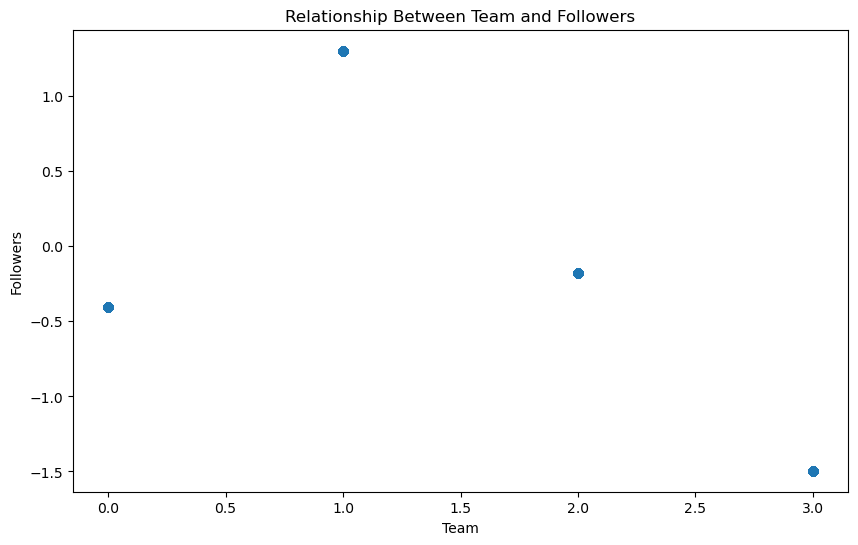

In [17]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
team_counts = df['Team'].value_counts()

plt.figure(figsize=(10, 6))  # Set the figure size

# Create a bar plot
team_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Each Team Category')
plt.xlabel('Team Category')
plt.ylabel('Count')

plt.show()


# Corelation Matrix

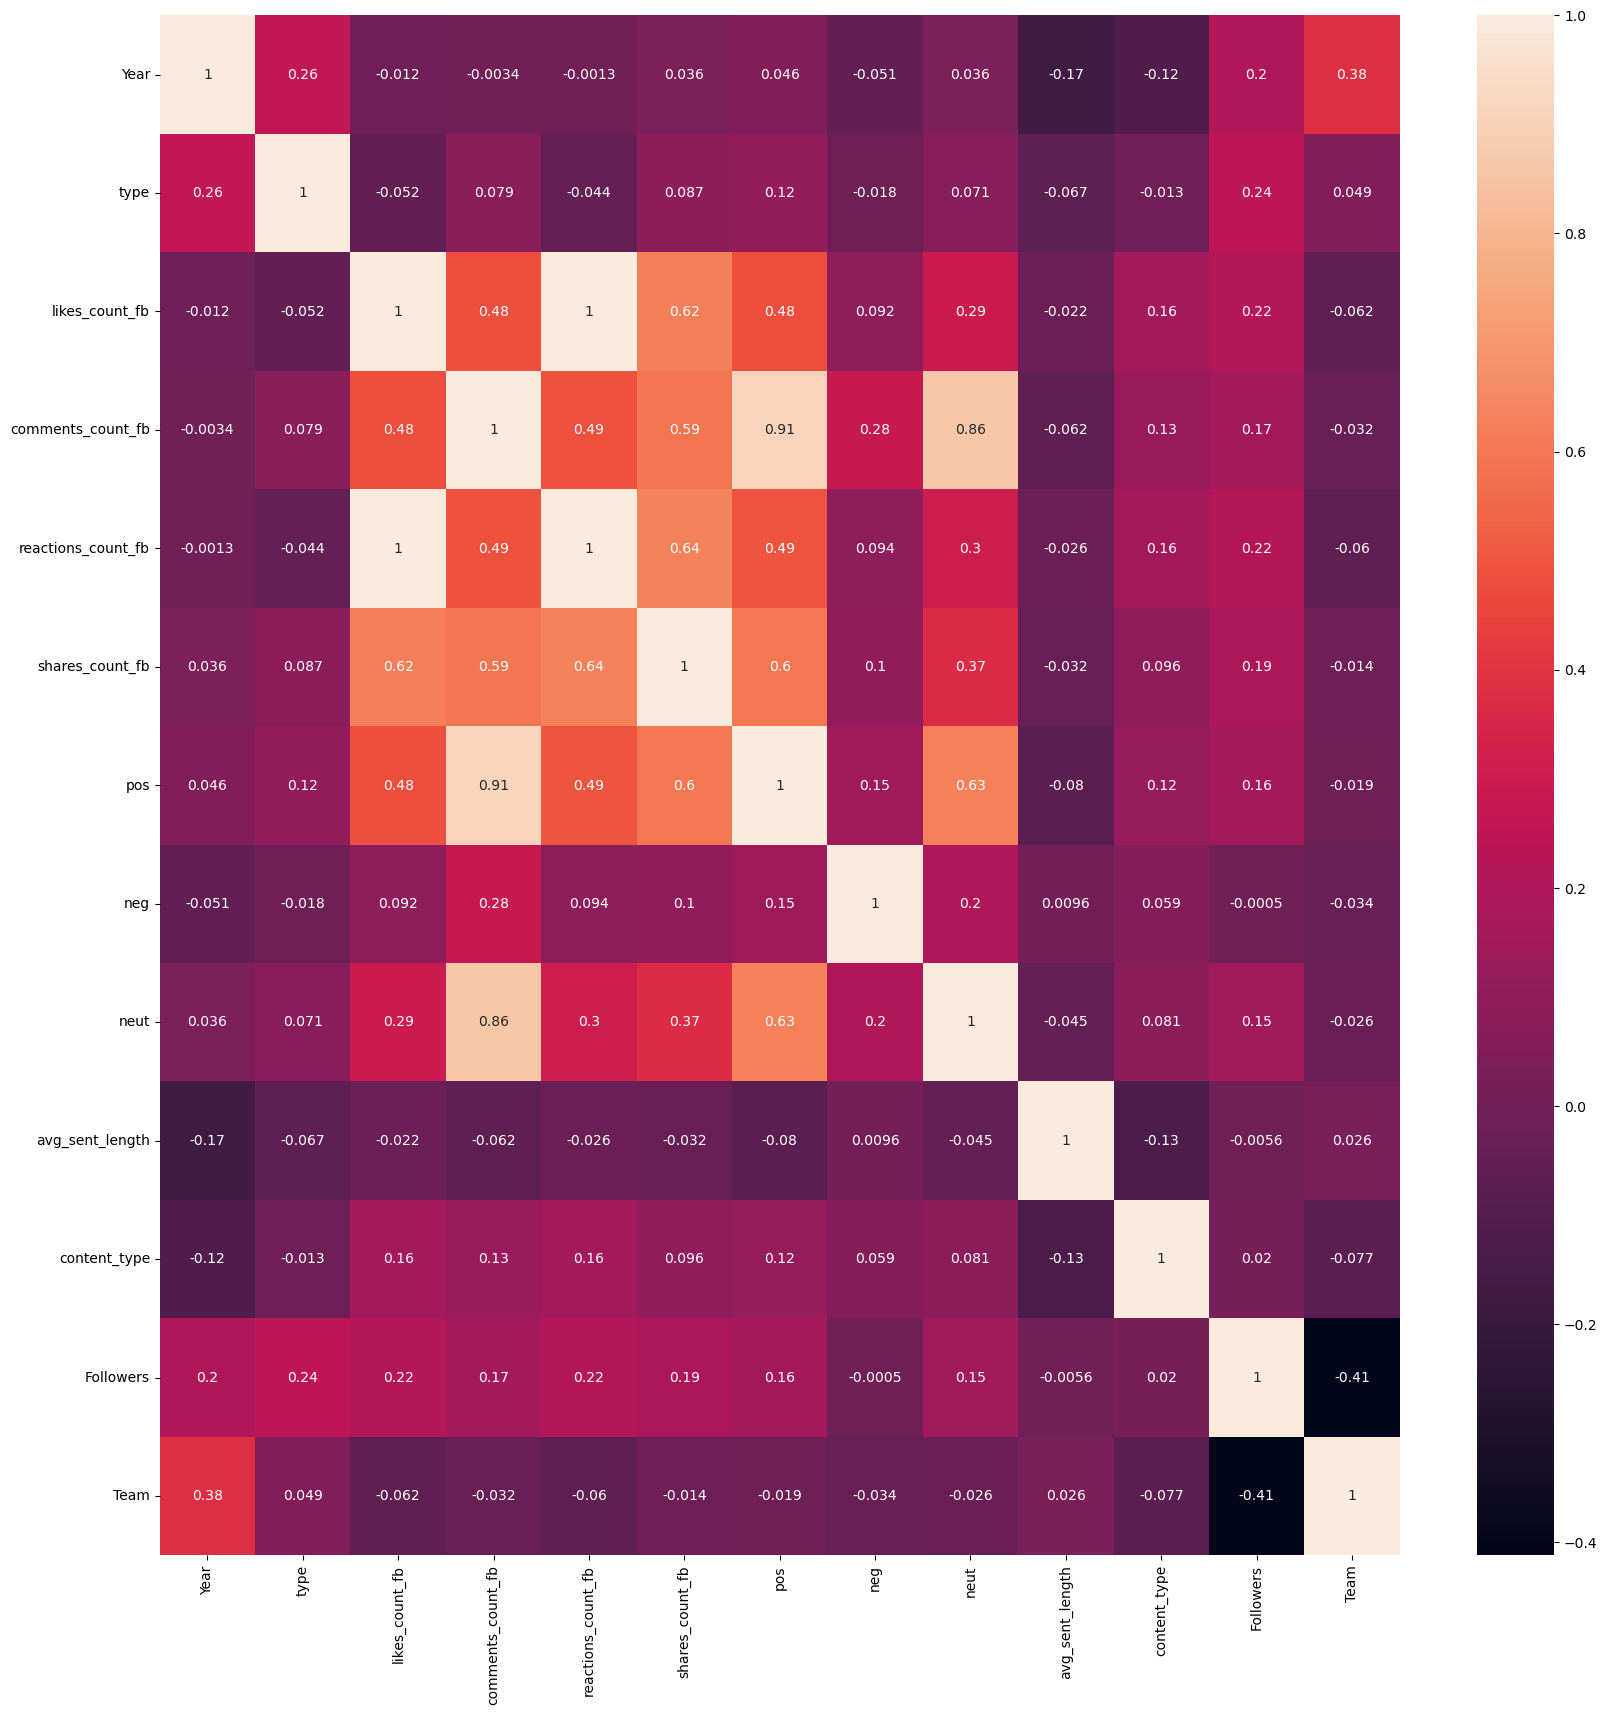

In [75]:
plt.figure(figsize=(20,20))  # You can adjust the figsize as needed
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

# Identifying input and target variables

In [76]:
# Splitting of data
X = df[['comments_count_fb', 'reactions_count_fb', 'shares_count_fb', 'avg_sent_length','likes_count_fb', 'Followers','pos','neg','neut']]
y = df['type']


# Splitting the Data

In this section we will be splitting the data into train and test data to train and validate our model respectively.Here the test size is 0.3 (30%) of the data and train size is 0.7 (70%).

Since the Dataset is sufficiently large we will chose train size as 0.7(70%) of the data to train the model.

Always training data is given more weightage because this is where the model learns patterns, relationships, and dependencies in the data. The model "fits" to the training data, adjusting its parameters (weights) to minimize the difference between its predictions and the actual target values. The training data is of utmost importance because it directly influences the model's performance.so that the model can be trained well and predictions can be made accurately.

Usually train data is given more weight so that model can be trained sufficiently.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
print('X train shape:', X_train.shape)
print('y train shape:', y_train.shape)
print('X test shape:', X_test.shape)
print('Y train shape:', y_test.shape)

X train shape: (1316, 9)
y train shape: (1316,)
X test shape: (564, 9)
Y train shape: (564,)


# Building Models

## Logistic Regression Model

In [79]:
# Initialize and train a Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

logistic_regression_predictions = logistic_regression_model.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions, average='weighted')
logistic_regression_recall = recall_score(y_test, logistic_regression_predictions, average='weighted')
logistic_regression_f1 = f1_score(y_test, logistic_regression_predictions, average='weighted')
logistic_regression_report = classification_report(y_test, logistic_regression_predictions)

print("Logistic Regression Precision:", logistic_regression_precision)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Logistic Regression f1:", logistic_regression_f1)
print("Logistic Regression recall:", logistic_regression_recall)
print("Logistic Regression Classification Report:\n", logistic_regression_report)

Logistic Regression Precision: 0.7104831560283688
Logistic Regression Accuracy: 0.7819148936170213
Logistic Regression f1: 0.6926787906631131
Logistic Regression recall: 0.7819148936170213
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.78      1.00      0.88       441
           3       0.50      0.02      0.04       110

    accuracy                           0.78       564
   macro avg       0.43      0.34      0.30       564
weighted avg       0.71      0.78      0.69       564



### Confusion Matrix for Logistic Regression

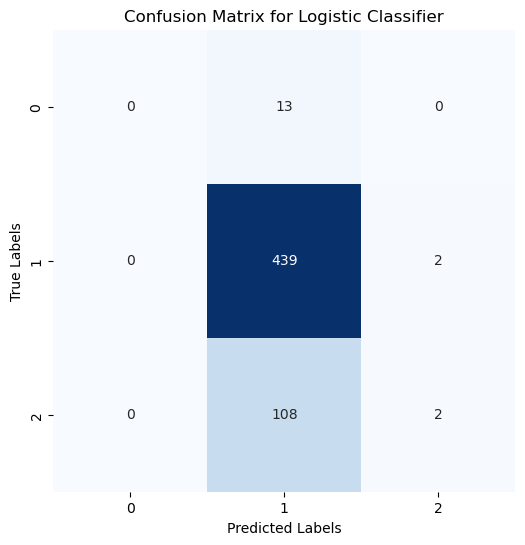

In [80]:
confusion = confusion_matrix(y_test, logistic_regression_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Classifier')
plt.show()

# KNN Classifier

In [100]:
# Initialize and train a knn model
knn_model = KNeighborsClassifier(n_neighbors=43)

knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
knn_report = classification_report(y_test, knn_predictions)

print("KNN Precision:", knn_precision)
print("KNN Accuracy:", knn_accuracy)
print("KNN f1:", knn_f1)
print("KNN recall:", knn_recall)
print("KNN Classification Report:\n", knn_report)

KNN Precision: 0.6113909008601177
KNN Accuracy: 0.7819148936170213
KNN f1: 0.686217846935535
KNN recall: 0.7819148936170213
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.78      1.00      0.88       441
           3       0.00      0.00      0.00       110

    accuracy                           0.78       564
   macro avg       0.26      0.33      0.29       564
weighted avg       0.61      0.78      0.69       564



### Confusion Matrix for KNN Classifier

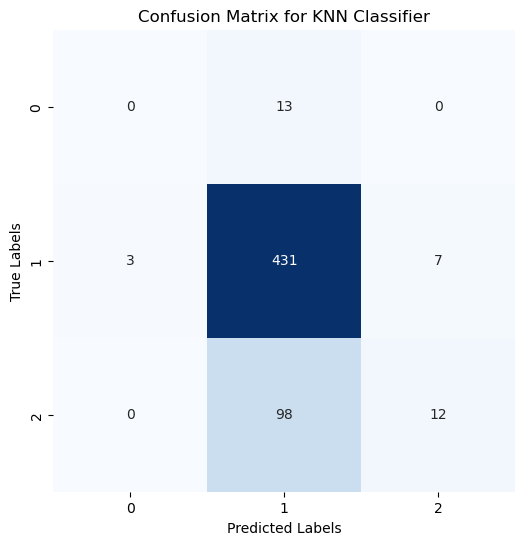

In [82]:
confusion = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Decision Tree Model

In [83]:
#DECISION TREE
decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train) #fitting the model
decision_tree_predictions = decision_tree_model.predict(X_test) #predicting the model

decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_f1 = f1_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_report = classification_report(y_test, decision_tree_predictions)

print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Precision:", decision_tree_precision)
print("Decision Tree recall:", decision_tree_recall)
print("Decision Tree f1:", decision_tree_f1)
print("Decision Tree Classification Report:\n", decision_tree_report)

Decision Tree Accuracy: 0.8333333333333334
Decision Tree Precision: 0.8435478191079882
Decision Tree recall: 0.8333333333333334
Decision Tree f1: 0.8382598251912686
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.23      0.19        13
           1       0.91      0.89      0.90       441
           2       0.00      0.00      0.00         0
           3       0.67      0.67      0.67       110

    accuracy                           0.83       564
   macro avg       0.44      0.45      0.44       564
weighted avg       0.84      0.83      0.84       564



### Confusion Matrix for Decision Tree Model

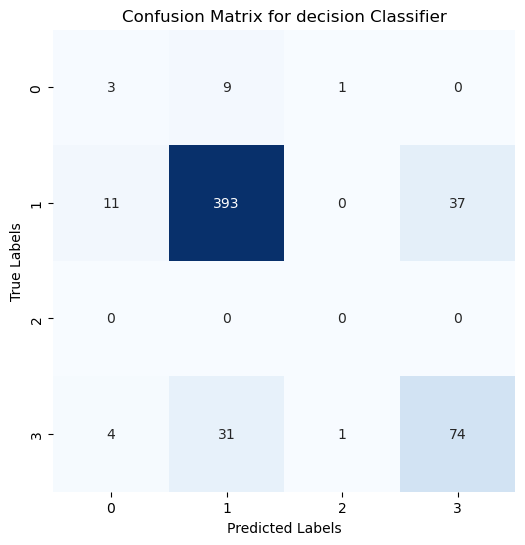

In [84]:
confusion = confusion_matrix(y_test, decision_tree_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for decision Classifier')
plt.show()

### Decision Tree

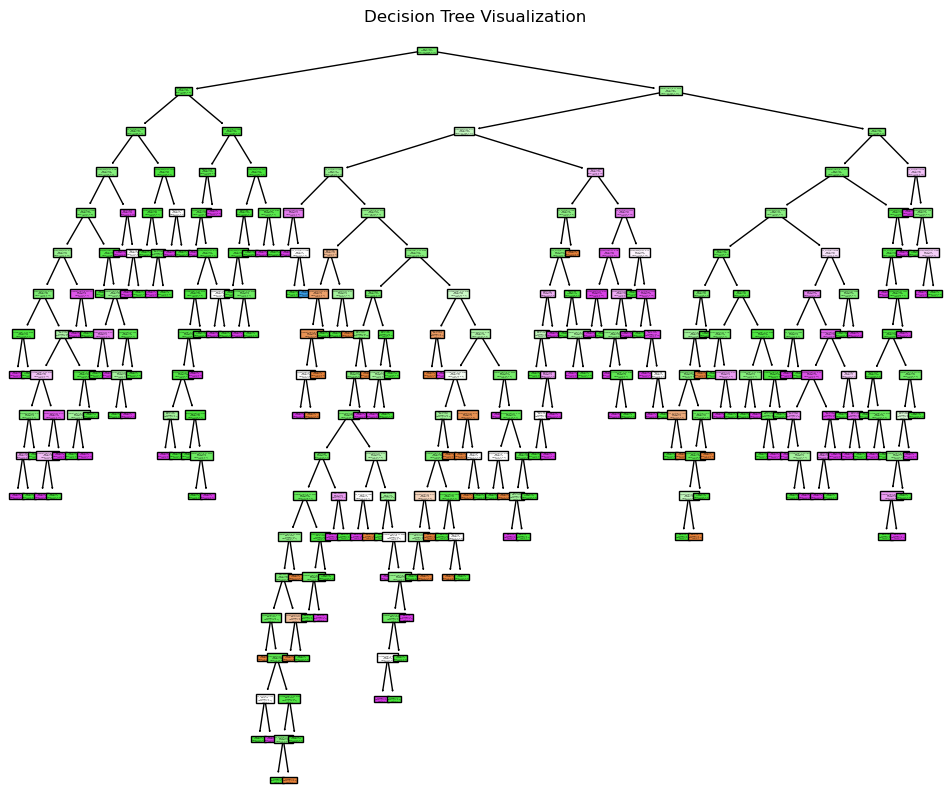

In [85]:
# Convert the index to a list
feature_names = X.columns.tolist()

# Plot the Decision Tree
plt.figure(figsize=(12, 10))
plot_tree(decision_tree_model, filled=True, feature_names=feature_names, class_names=[str(x) for x in decision_tree_model.classes_])
plt.title("Decision Tree Visualization")
plt.show()

# Gradient Boost Model

In [86]:
# Initialize and train a Gradient Boosting Regressor
regressor = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

print(accuracy_score(y_test, y_pred))

gradient_boost_accuracy = accuracy_score(y_test, y_pred)
gradient_boost_precision = precision_score(y_test, y_pred, average='weighted')
gradient_boost_recall = recall_score(y_test, y_pred, average='weighted')
gradient_boost_f1 = f1_score(y_test, y_pred, average='weighted')
gradient_boost_report = classification_report(y_test, y_pred)

print("Gradient Boost Accuracy:", gradient_boost_accuracy)
print("Gradient Boost Precision:", gradient_boost_precision)
print("Gradient Boost Recall:", gradient_boost_recall)
print("Gradient Boost F1 Score:", gradient_boost_f1)
print("Gradient Boost Classification Report:\n", gradient_boost_report)

0.8865248226950354
Gradient Boost Accuracy: 0.8865248226950354
Gradient Boost Precision: 0.8794421634767036
Gradient Boost Recall: 0.8865248226950354
Gradient Boost F1 Score: 0.8776877421410708
Gradient Boost Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.23      0.32        13
           1       0.90      0.97      0.93       441
           3       0.85      0.64      0.73       110

    accuracy                           0.89       564
   macro avg       0.75      0.61      0.66       564
weighted avg       0.88      0.89      0.88       564



### Confusion Matrix for Gradient Boost Model

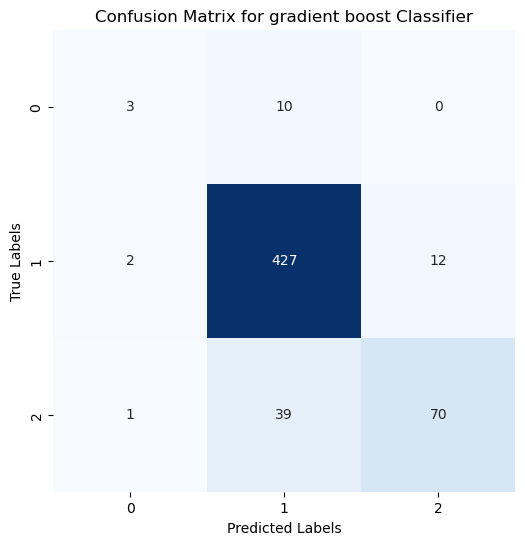

In [87]:
confusion = confusion_matrix(y_test, gradient_boost_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for gradient boost Classifier')
plt.show()

# ADABoost Model

In [88]:
# Initialize and train an AdaBoost Classifier
classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

ada_boost_accuracy = accuracy_score(y_test, y_pred)
ada_boost_precision = precision_score(y_test, y_pred, average='weighted')
ada_boost_recall = recall_score(y_test, y_pred, average='weighted')
ada_boost_f1 = f1_score(y_test, y_pred, average='weighted')
ada_boost_report = classification_report(y_test, y_pred)

print("AdaBoost Accuracy:", ada_boost_accuracy)
print("AdaBoost Boost Precision:", ada_boost_precision)
print("AdaBoost Boost Recall:", ada_boost_recall)
print("AdaBoost Boost F1 Score:", ada_boost_f1)
print("AdaBoost Boost Classification Report:\n", ada_boost_report)

AdaBoost Accuracy: 0.40602836879432624
AdaBoost Boost Precision: 0.6747961740351138
AdaBoost Boost Recall: 0.40602836879432624
AdaBoost Boost F1 Score: 0.4466444808228118
AdaBoost Boost Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.62      0.23        13
           1       0.81      0.35      0.48       441
           3       0.22      0.62      0.32       110

    accuracy                           0.41       564
   macro avg       0.39      0.53      0.34       564
weighted avg       0.67      0.41      0.45       564



### Confusion Matrix for ADABoost Model

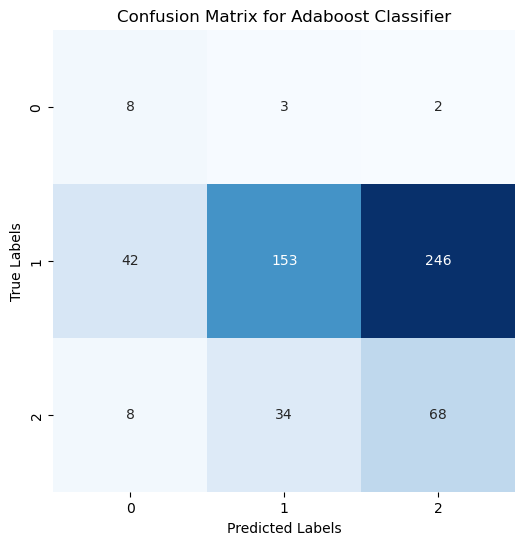

In [89]:
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Adaboost Classifier')
plt.show()

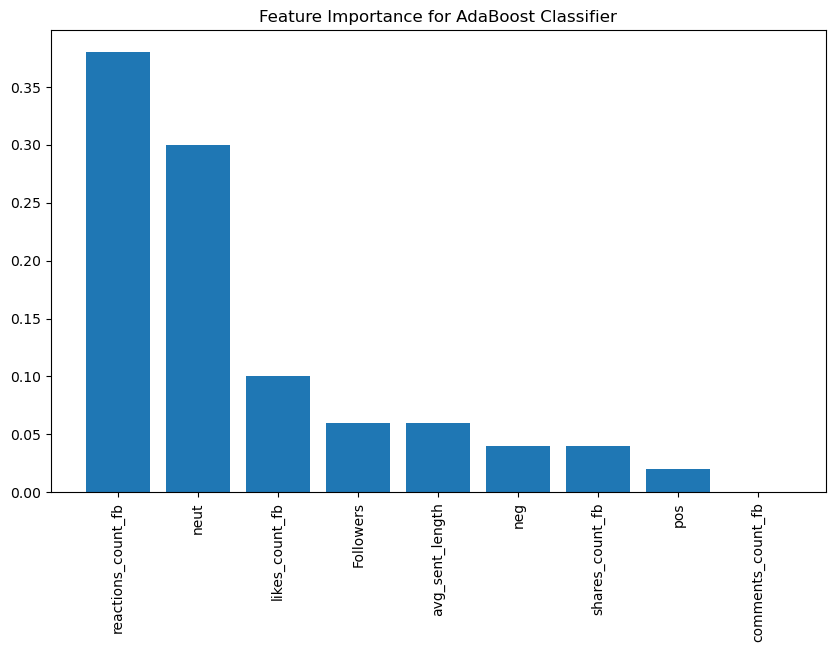

In [90]:
# Get feature importances from the trained model
feature_importances = classifier.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title("Feature Importance for AdaBoost Classifier")
plt.show()

# XGBoost Model

In [91]:
# Initialize and train an XGBoost model
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

xgboost_predictions = xgboost_model.predict(X_test)

xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
xgboost_precision = precision_score(y_test, xgboost_predictions, average='weighted')
xgboost_recall = recall_score(y_test, xgboost_predictions, average='weighted')
xgboost_f1 = f1_score(y_test, xgboost_predictions, average='weighted')
xgboost_report = classification_report(y_test, xgboost_predictions)

print("XGBoost Precision:", xgboost_precision)
print("XGBoost Accuracy:", xgboost_accuracy)
print("XGBoost f1:", xgboost_f1)
print("XGBoost recall:", xgboost_recall)
print("XGBoost Classification Report:\n", xgboost_report)

XGBoost Precision: 0.8791316648396458
XGBoost Accuracy: 0.8812056737588653
XGBoost f1: 0.878572817834792
XGBoost recall: 0.8812056737588653
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.54      0.50        13
           1       0.91      0.95      0.93       441
           3       0.80      0.66      0.73       110

    accuracy                           0.88       564
   macro avg       0.73      0.72      0.72       564
weighted avg       0.88      0.88      0.88       564



### Confusion Matrix for XGBoost Model

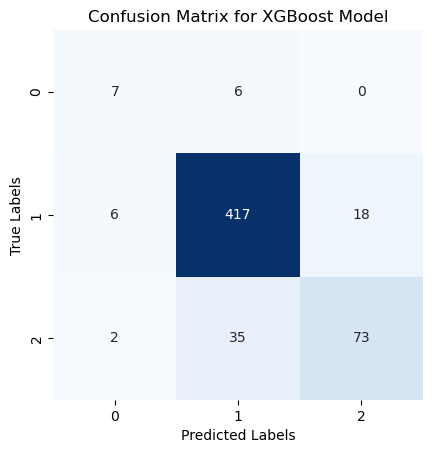

In [92]:
confusion = confusion_matrix(y_test, xgboost_predictions)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

# Random Forest Model

In [101]:
#RANDOM FOREST
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train) #fitting the model
random_forest_predictions = random_forest_model.predict(X_test) #predicting the model

random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_predictions, average='weighted')
random_forest_f1 = f1_score(y_test, random_forest_predictions, average='weighted')
random_forest_report = classification_report(y_test, random_forest_predictions)

print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Precision:", random_forest_precision)
print("Random Forest recall:", random_forest_recall)
print("Random Forest f1:", random_forest_f1)
print("Random Forest Classification Report:\n", random_forest_report)

Random Forest Accuracy: 0.8882978723404256
Random Forest Precision: 0.8855918332002753
Random Forest recall: 0.8882978723404256
Random Forest f1: 0.8789108761641027
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        13
           1       0.89      0.98      0.93       441
           3       0.90      0.60      0.72       110

    accuracy                           0.89       564
   macro avg       0.77      0.63      0.68       564
weighted avg       0.89      0.89      0.88       564



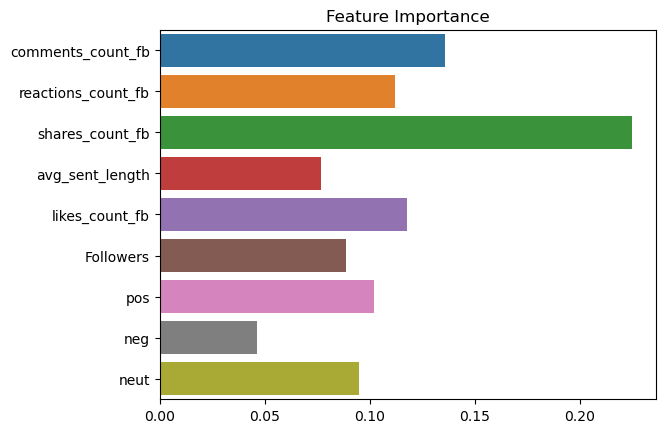

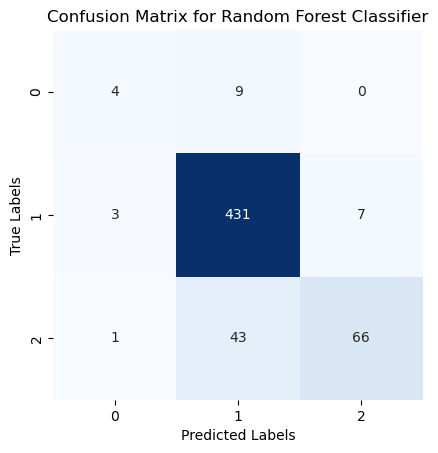

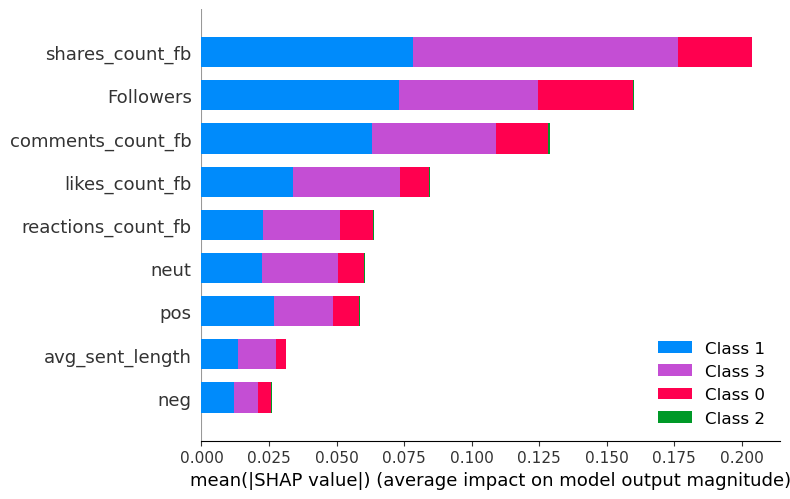

In [94]:
# Feature Importance Plot
feature_importance = random_forest_model.feature_importances_
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance")
plt.show()

confusion = confusion_matrix(y_test, random_forest_predictions)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

if len(random_forest_model.classes_) == 2:
    probabilities = random_forest_model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    auc = roc_auc_score(y_test, probabilities)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [95]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

regressor = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_regressor = RandomForestClassifier(random_state=42, **best_params)
best_regressor.fit(X_train, y_train)

y_pred = best_regressor.predict(X_test)

HP_accuracy = accuracy_score(y_test, y_pred)
HP_precision = precision_score(y_test, y_pred, average='weighted')
HP_recall = recall_score(y_test, y_pred, average='weighted')
HP_f1 = f1_score(y_test, y_pred, average='weighted')
HP_report = classification_report(y_test, y_pred)

print("HP Accuracy:", HP_accuracy)
print("HP Precision:", HP_precision)
print("HP Forest recall:", HP_recall)
print("HP f1:", HP_f1)
print("Best Hyperparameters:", best_params)
print("HP Classification Report:\n", HP_report)

HP Accuracy: 0.8794326241134752
HP Precision: 0.8747557580840968
HP Forest recall: 0.8794326241134752
HP f1: 0.8680865234531775
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
HP Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.23      0.30        13
           1       0.88      0.98      0.93       441
           3       0.89      0.57      0.70       110

    accuracy                           0.88       564
   macro avg       0.73      0.59      0.64       564
weighted avg       0.87      0.88      0.87       564



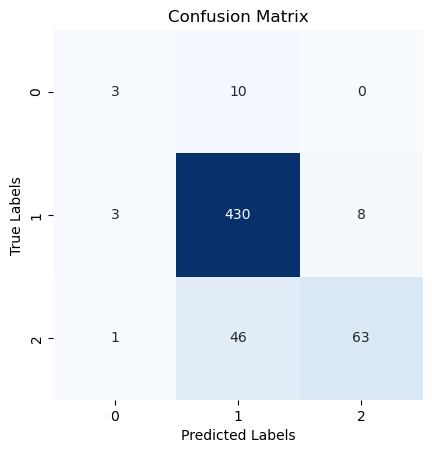

In [96]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

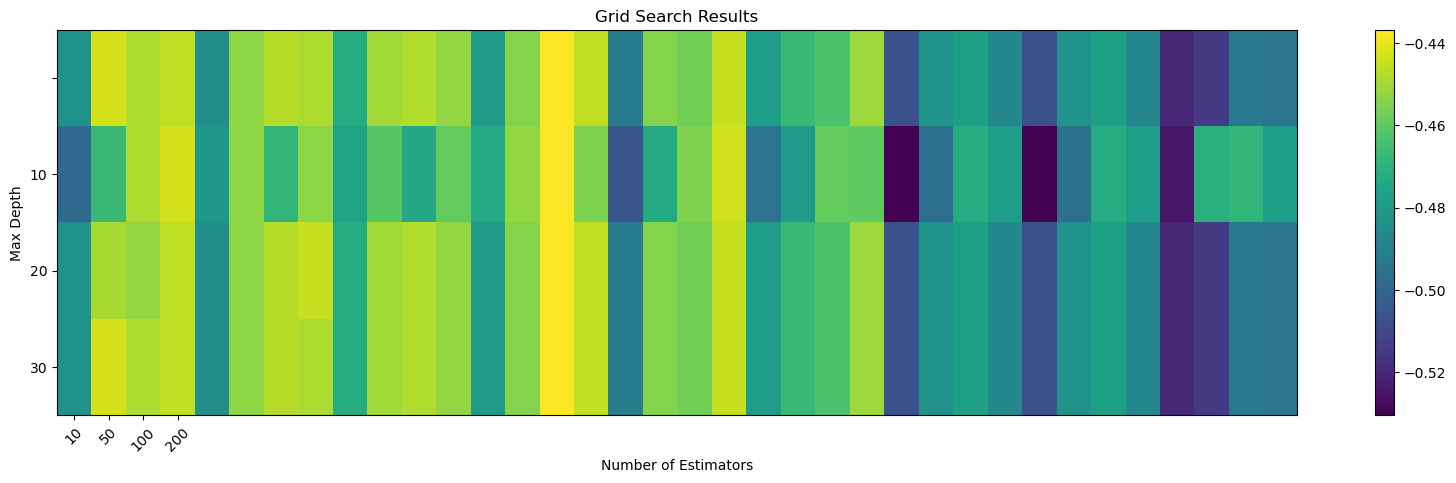

In [97]:
# Access the results of the grid search
results = grid_search.cv_results_

# Plot the mean test score for different hyperparameter combinations
plt.figure(figsize=(20, 5))
plt.imshow(results['mean_test_score'].reshape(len(param_grid['max_depth']), -1), cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'], rotation=45)
plt.yticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Grid Search Results')
plt.show()

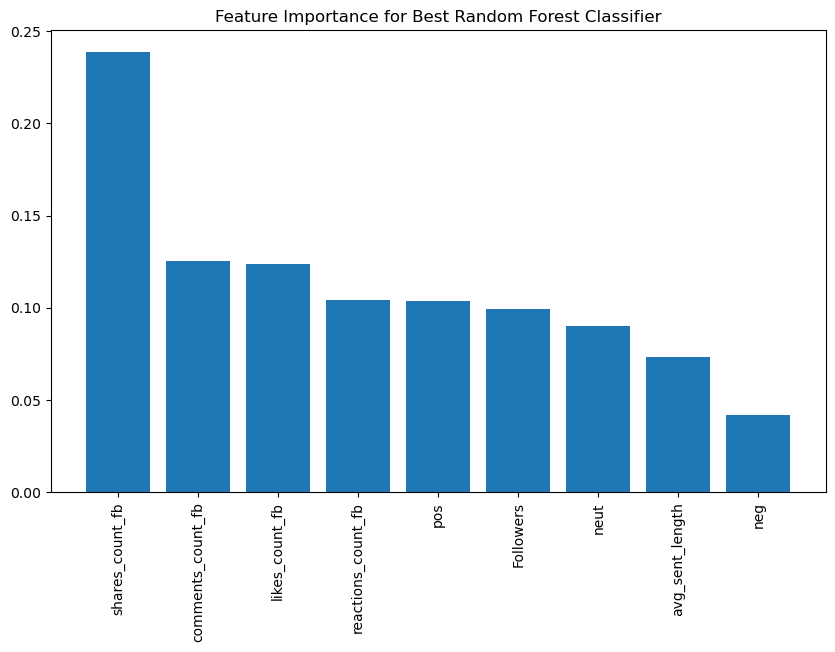

In [98]:
# Get feature importances from the best model
feature_importances = best_regressor.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title("Feature Importance for Best Random Forest Classifier")
plt.show()

## Results

| Description  of Model    | Accuracy | Recall   | Precision | f1-score |
|--------------------------|----------|----------|-----------|----------|
| Logistic                 | 0.78     | 0.78     | 0.71      | 0.69     |
| KNN                      | 0.78     | 0.78     | 0.84      | 0.72     |
| Decision Tree            | 0.83     | 0.83     | 0.84      | 0.83     |
| Random Forest            | 0.88     | 0.88     | 0.88      | 0.87     |
| Ada Boost                | 0.40     | 0.40     | 0.67      | 0.44     |
| Gradient Boost           | 0.88     | 0.88     | 0.87      | 0.87     |
| XG Boost                 | 0.88     | 0.88     | 0.87      | 0.87     |


## Conclusion

In pursuit of the primary objective to discern the pivotal criteria guiding the classification of social media posts into distinct categories (e.g., 'picture,' 'video,' 'link,' or 'status'), as well as to construct a robust prediction model for characterizing posts based on their engagement indicators, we have made significant strides in understanding and addressing these challenges. Our findings and the predictive model offer valuable insights into social media content management and audience engagement strategies.

Key Findings:

Classification of Social Media Posts: We have identified the key features that influence the categorization of social media posts. These include content type, engagement metrics (likes, comments, reactions, shares), average sentence length, and the number of followers. Each of these factors plays a distinct role in post classification.

We have successfully developed a model that reliably determines the nature of a post based on its interaction indicators. This model leverages machine learning techniques, particularly Random Forest, to provide accurate predictions. It enables the automatic categorization of posts, thereby streamlining content management.

Business Implications:

The implications of our analysis and predictive model are far-reaching:

Improved Content Management: The ability to automatically classify posts based on their characteristics empowers social media managers to streamline content management processes, ensuring that each post is appropriately categorized.

Enhanced User Engagement: The prediction model's capacity to assess engagement metrics allows for more targeted and effective user engagement strategies. Tailoring content and engagement efforts to the specific type of post and its attributes leads to increased user interaction and audience satisfaction.

Optimized Strategy Development: With a deeper understanding of what makes a post more engaging (e.g., longer sentence length or higher follower counts), social media strategies can be optimized for better results.

Future Work:

Looking ahead, we can consider the following areas for future exploration:

Refinement of the Model: Continuous refinement of our prediction model could lead to even more accurate post categorization and engagement prediction.

Incorporation of Real-Time Data: Integrating real-time data feeds to the model may enhance its predictive power and responsiveness.

Expansion of Content Categories: Expanding the scope to include more post categories and attributes could further enrich the model's capabilities.

In conclusion, our analysis and predictive model mark a significant step forward in the realm of social media content management and user engagement. By understanding the determinants of post categorization and creating a reliable prediction model, we equip businesses and organizations with the tools they need to succeed in the dynamic world of social media marketing.